# INTRO

## Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np


## Load Data

In [2]:

data = pd.read_csv('../data/raw/Loan_Default.csv')
# Show all columns
pd.set_option('display.max_columns', None)
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
print(data.columns)

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


## Data Exploration

In [4]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
data.sample(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
43475,68365,2019,ncf,Joint,nopre,type1,p4,l1,nopc,nob/c,566500,NaN,NaN,NaN,360.0,neg_amm,not_int,not_lpsm,648000.0,sb,pr,home,1U,12300.0,CIB,685,EXP,55-64,to_inst,87.422840,south,direct,1,31.0
51295,76185,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,596500,4.750,0.4683,NaN,360.0,not_neg,not_int,not_lpsm,638000.0,sb,pr,home,1U,11280.0,EXP,829,CIB,25-34,to_inst,93.495298,south,direct,0,20.0
84313,109203,2019,cf,Sex Not Available,NaN,type2,p3,l1,nopc,b/c,266500,3.750,0.9655,3637.56,360.0,not_neg,int_only,not_lpsm,338000.0,sb,pr,home,1U,8460.0,CIB,532,EXP,45-54,to_inst,78.846154,south,direct,0,25.0
115915,140805,2019,cf,Female,pre,type1,p4,l1,nopc,nob/c,546500,4.560,1.1717,1883.68,360.0,not_neg,not_int,not_lpsm,588000.0,sb,pr,home,1U,7200.0,EXP,852,CIB,45-54,not_inst,92.942177,central,direct,0,47.0
121498,146388,2019,cf,Male,nopre,type1,p2,l1,nopc,nob/c,106500,3.750,0.2674,2800.00,360.0,not_neg,not_int,not_lpsm,338000.0,sb,pr,home,1U,2100.0,CRIF,709,CIB,65-74,not_inst,31.508876,North,direct,0,48.0
128659,153549,2019,ncf,Female,nopre,type1,p1,l1,nopc,nob/c,246500,3.990,0.2987,8336.88,360.0,not_neg,not_int,not_lpsm,288000.0,sb,pr,home,1U,3360.0,CRIF,671,EXP,35-44,to_inst,85.590278,North,direct,0,47.0
62378,87268,2019,cf,Female,pre,type2,p3,l1,nopc,b/c,186500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,208000.0,sb,pr,home,1U,2280.0,CIB,781,CIB,65-74,to_inst,89.663462,south,direct,1,49.0
118982,143872,2019,cf,Female,pre,type1,p1,l1,nopc,nob/c,136500,4.375,0.2870,1150.00,360.0,not_neg,not_int,not_lpsm,138000.0,sb,pr,home,1U,3060.0,CRIF,790,CIB,35-44,to_inst,98.913043,North,direct,0,30.0
95617,120507,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,306500,3.750,0.2768,6357.75,360.0,not_neg,not_int,not_lpsm,348000.0,sb,pr,home,1U,5880.0,CIB,698,CIB,35-44,not_inst,88.074713,North,direct,0,36.0
49888,74778,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,326500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,5760.0,EQUI,703,EXP,35-44,to_inst,NaN,North,direct,1,NaN


In [7]:
print(data.shape)
print(data.columns)

(148670, 34)
Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [8]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

# EDA

## Data Cleaning: Dropping and Handling Missing Values

### What We Are Doing
1. **Dropping Unnecessary Columns**  
   - Removing columns that are not needed for analysis:  
     `'loan_limit'`, `'rate_of_interest'`, `'Interest_rate_spread'`, `'Upfront_charges'`, `'property_value'`, `'dtir1'`, and `'LTV'`.  
   - This reduces dimensionality and improves efficiency.

2. **Handling Missing Values**  
   - Iterating through all columns in the dataset:
     - If a column has missing values:
       - If it's numerical (`float64` or `int64`), we fill missing values with the **median** to avoid skewing the data.
       - If it's categorical, we fill missing values with the **most frequent value** (mode).
   - This ensures that no missing values remain, preventing errors in analysis or modeling.

3. **Validation**  
   - Printing the count of missing values after imputation to confirm that all missing data has been handled.


In [9]:
# Dropping unnecessary columns
unnecessary_columns = ['loan_limit', 'rate_of_interest', 'Interest_rate_spread', 
                        'Upfront_charges', 'property_value', 'dtir1', 'LTV']
data.drop(unnecessary_columns, axis=1, inplace=True)
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,360.0,not_neg,not_int,not_lpsm,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1
1,24891,2019,Male,nopre,type2,p1,l1,nopc,b/c,206500,360.0,not_neg,not_int,lpsm,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1
2,24892,2019,Male,pre,type1,p1,l1,nopc,nob/c,406500,360.0,neg_amm,not_int,not_lpsm,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0
3,24893,2019,Male,nopre,type1,p4,l1,nopc,nob/c,456500,360.0,not_neg,not_int,not_lpsm,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0
4,24894,2019,Joint,pre,type1,p1,l1,nopc,nob/c,696500,360.0,not_neg,not_int,not_lpsm,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0


In [10]:
# Handling missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype in ['float64', 'int64']:  
            data[column] = data[column].fillna(data[column].median())  # Explicit assignment
        else:  
            data[column] = data[column].fillna(data[column].mode()[0])  # Explicit assignment

print(data.isnull().sum())

ID                           0
year                         0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: int64


## Encoding Categorical Variables

### Why?
Machine learning models require numerical inputs. Categorical (dtype = object) variables must be converted to numbers to be processed effectively.

### How?

1. **Label Encoding**  
   - Converts categorical columns (`label_columns`) into numerical values.  
   - Each unique category is assigned an integer.  
   - Suitable for ordinal data but can introduce unintended ordinal relationships for nominal categories.  

2. **One-Hot Encoding (`get_dummies`)**  
   - Applied to `'Region'` to create binary columns for each category.  
   - `drop_first=True` removes one category to prevent multicollinearity.  
   - Ensures categorical data is represented without imposing a false order.  


In [11]:
# Necessery imports for this chapter:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# Print the unique values of the categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

Gender: ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv: ['nopre' 'pre']
loan_type: ['type1' 'type2' 'type3']
loan_purpose: ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness: ['l1' 'l2']
open_credit: ['nopc' 'opc']
business_or_commercial: ['nob/c' 'b/c']
Neg_ammortization: ['not_neg' 'neg_amm']
interest_only: ['not_int' 'int_only']
lump_sum_payment: ['not_lpsm' 'lpsm']
construction_type: ['sb' 'mh']
occupancy_type: ['pr' 'sr' 'ir']
Secured_by: ['home' 'land']
total_units: ['1U' '2U' '3U' '4U']
credit_type: ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type: ['CIB' 'EXP']
age: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application: ['to_inst' 'not_inst']
Region: ['south' 'North' 'central' 'North-East']
Security_Type: ['direct' 'Indriect']


In [13]:
# Label Encoding for Binary & Ordinal Categories
label_cols = [
    'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 
    'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 
    'construction_type', 'occupancy_type', 'Secured_by', 'submission_of_application', 'Security_Type'
]
categorical_columns = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# One-Hot Encoding for Nominal Categories
one_hot_cols = ['total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'Region']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

In [14]:
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,income,Credit_Score,submission_of_application,Security_Type,Status,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
0,24890,2019,3,0,0,0,0,0,1,116500,360.0,1,1,1,1,1,0,1740.0,758,1,1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,24891,2019,2,0,1,0,0,0,0,206500,360.0,1,1,0,1,1,0,4980.0,552,1,1,1,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
2,24892,2019,2,1,0,0,0,0,1,406500,360.0,0,1,1,1,1,0,9480.0,834,1,1,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True
3,24893,2019,2,0,0,3,0,0,1,456500,360.0,1,1,1,1,1,0,11880.0,587,0,1,0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
4,24894,2019,1,1,0,0,0,0,1,696500,360.0,1,1,1,1,1,0,10440.0,602,0,1,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False


---


In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

## 1️⃣ Loan Amount Distribution (Histogram with KDE)

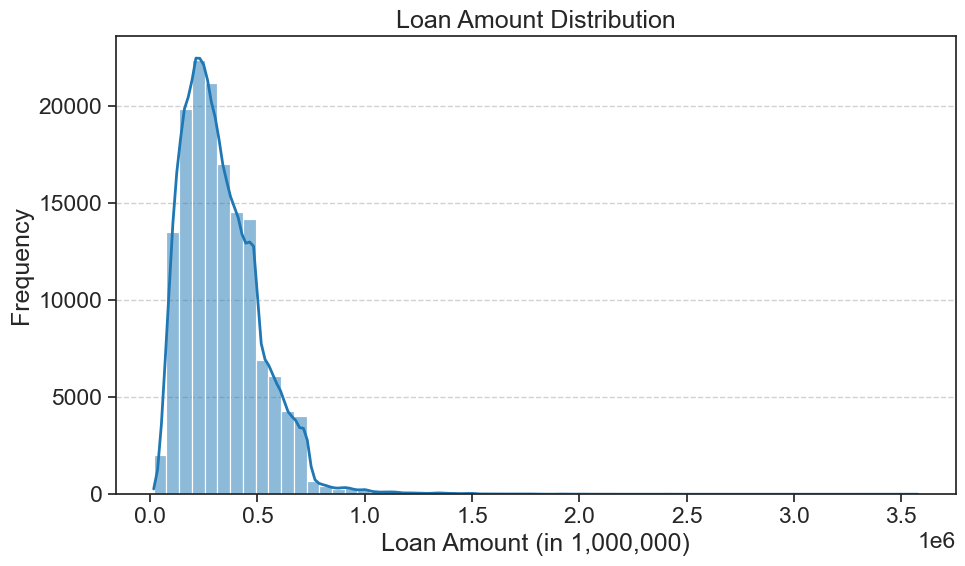

In [16]:
"""
# Loan Amount Distribution
# --------------------------------------------------------------
# Description: Plots the density distribution of loan amounts in the dataset.
# Insights:
#  - Loan amounts are heavily skewed towards smaller values (< $500,000).
#  - High loan amounts are rare in the dataset.
# Evidence:
#  - Peak density occurs at lower loan amounts, with frequency dropping sharply beyond $500,000.
# Action:
#  - Use log transformation or binning to normalize the distribution for modeling.
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme and styling configurations
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2})

# Create figure
plt.figure(figsize=(10, 6))
sns.despine()
sns.histplot(data['loan_amount'], kde=True, bins=60)

# Customizations
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount (in 1,000,000)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.9)  

# Show plot
plt.tight_layout()
plt.show()


## 2️⃣ Loan Default Distribution (Bar Plot)


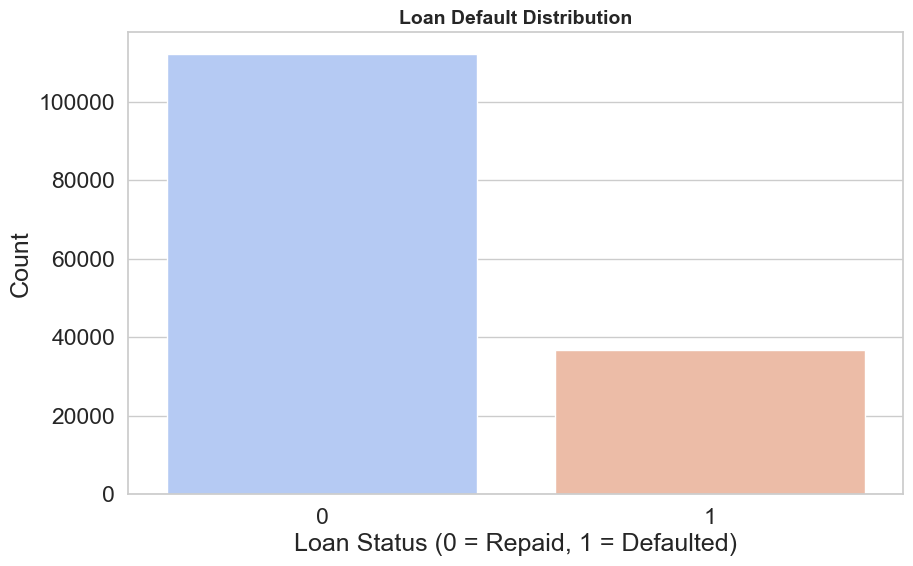

In [17]:
"""
# Loan Default Distribution
# --------------------------------------------------------------
# Description: Visualizes the distribution of loan status (repaid vs. defaulted).
# Insights:
#  - Majority of loans (Status = 0) are repaid.
#  - Defaulted loans (Status = 1) represent a smaller proportion.
# Evidence:
#  - The count of repaid loans (blue bar) is significantly higher than the defaulted loans (orange bar).

"""
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Status", hue="Status", data=data, palette="coolwarm", legend=False)
plt.title("Loan Default Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Loan Status (0 = Repaid, 1 = Defaulted)")
plt.ylabel("Count")
plt.show()

## 3️⃣ Credit Score Distribution for Loan Default vs. Repaid (KDE Plot)

In [21]:
data['Credit_Score'].range()

AttributeError: 'Series' object has no attribute 'range'

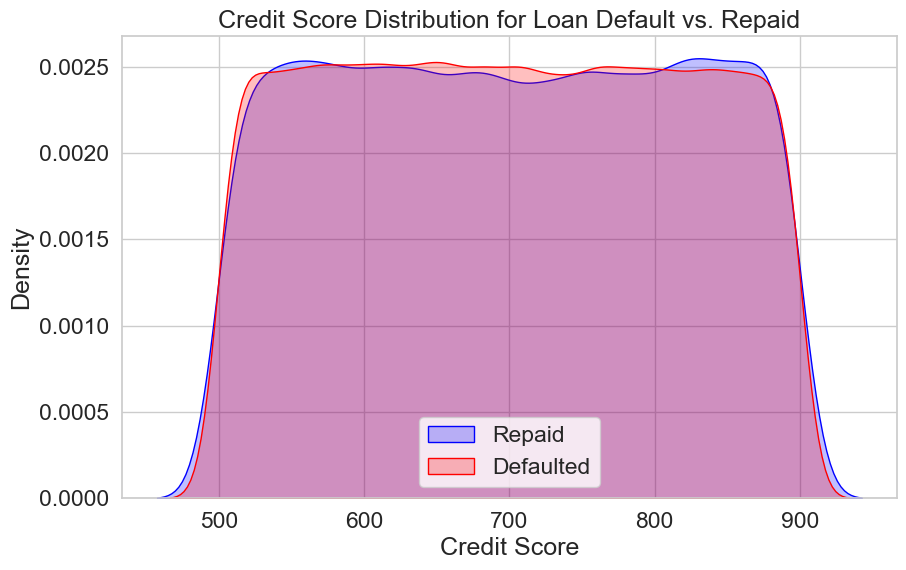

In [18]:
"""
# Credit Score Distribution (Default vs. Repaid)
# --------------------------------------------------------------
# Description: Compares the credit score distributions of defaulters (Status = 1) and non-defaulters (Status = 0).
# Insights:
#  - Minimal difference in the credit score distributions of the two groups.
# Evidence:
#  - Overlapping KDE curves (blue for repaid, red for defaulted).
# Action:
#  - Combine credit score with other variables (e.g., income, loan amount) for better predictive power.
"""
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data["Status"]==1]["Credit_Score"], label="Repaid", fill=True, color="blue")
sns.kdeplot(data[data["Status"]==0]["Credit_Score"], label="Defaulted", fill=True, color="red")
plt.title("Credit Score Distribution for Loan Default vs. Repaid")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.legend()
plt.show()


In [19]:
# Calculate Debt-to-Income Ratio (DTI)
data["DTI"] = data["loan_amount"] / data["income"]

# Separate by repayment status
dti_repaid = data[data["Status"] == 1]["DTI"]
dti_defaulted = data[data["Status"] == 0]["DTI"]

In [ ]:
# Calculate Debt-to-Income Ratio (DTI)
data["DTI"] = data["loan_amount"] / data["income"]

# Separate by repayment status
dti_repaid = data[data["Status"] == 1]["DTI"]
dti_defaulted = data[data["Status"] == 0]["DTI"]

credit_score_repaid = data[data["Status"]==1]["Credit_Score"]
credit_score_defaulted = data[data["Status"]==0]["Credit_Score"]

income_repaid = data[data["Status"]==1]["income"]
income_defaulted = data[data["Status"]==0]["income"]

loan_amount_repaid = data[data["Status"]==1]["loan_amount"]
loan_amount_defaulted = data[data["Status"]==0]["loan_amount"]

# Create figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Credit Score Distribution
sns.boxplot(dti_repaid, label="Repaid", fill=True, color="blue", ax=ax[0])
sns.boxplot(dti_defaulted, label="Defaulted", fill=True, color="red", ax=ax[0])
ax[0].set_title("Credit Score Distribution")
ax[0].set_xlabel("Credit Score")
ax[0].set_ylabel("Density")
ax[0].legend()

# Income Distribution
sns.kdeplot(dti_repaid, label="Repaid", fill=True, color="blue", ax=ax[1])
sns.kdeplot(dti_defaulted, label="Defaulted", fill=True, color="red", ax=ax[1])
ax[1].set_title("Income Distribution")
ax[1].set_xlabel("Income")
ax[1].set_ylabel("Density")
ax[1].legend()

# Loan Amount Distribution
sns.kdeplot(loan_amount_repaid, label="Repaid", fill=True, color="blue", ax=ax[2])
sns.kdeplot(loan_amount_defaulted, label="Defaulted", fill=True, color="red", ax=ax[2])
ax[2].set_title("Loan Amount Distribution")
ax[2].set_xlabel("Loan Amount")
ax[2].set_ylabel("Density")
ax[2].legend()

# Show plot
# plt.tight_layout()
plt.show()




## 4️⃣ Loan Amount Distribution by Loan Default Status (Boxplot)

/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_14853/285807816.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y="loan_amount", data=data, palette="coolwarm")


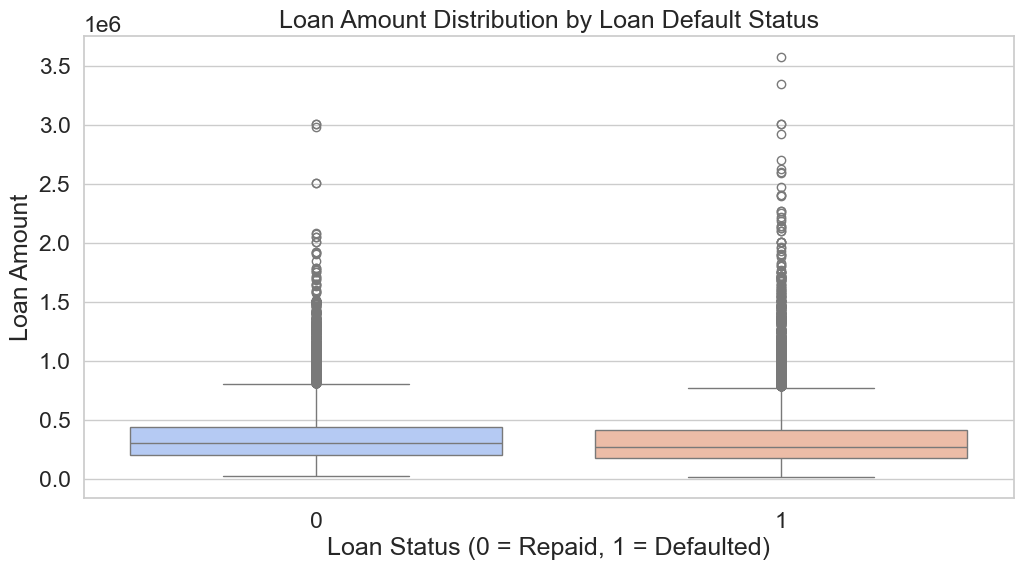

In [70]:
"""
# Loan Amount by Loan Status (Boxplot)
# --------------------------------------------------------------
# Description: Shows how loan amounts vary across default statuses.
# Insights:
#  - Median loan amount is slightly higher for defaulted loans (Status = 1).
#  - Significant overlap in loan amount ranges between defaulted and repaid loans.
# Evidence:
#  - Boxplot whiskers and outliers show wide variance in both categories.
# Action:
#  - Derive new features (e.g., loan-to-income ratio) to enhance differentiation between groups.
"""

plt.figure(figsize=(12,6))
sns.boxplot(x="Status", y="loan_amount", data=data, palette="coolwarm")
plt.title("Loan Amount Distribution by Loan Default Status")
plt.xlabel("Loan Status (0 = Repaid, 1 = Defaulted)")
plt.ylabel("Loan Amount")
plt.show()


## 5️⃣ Income vs Loan Amount with Default Status (Scatter Plot)

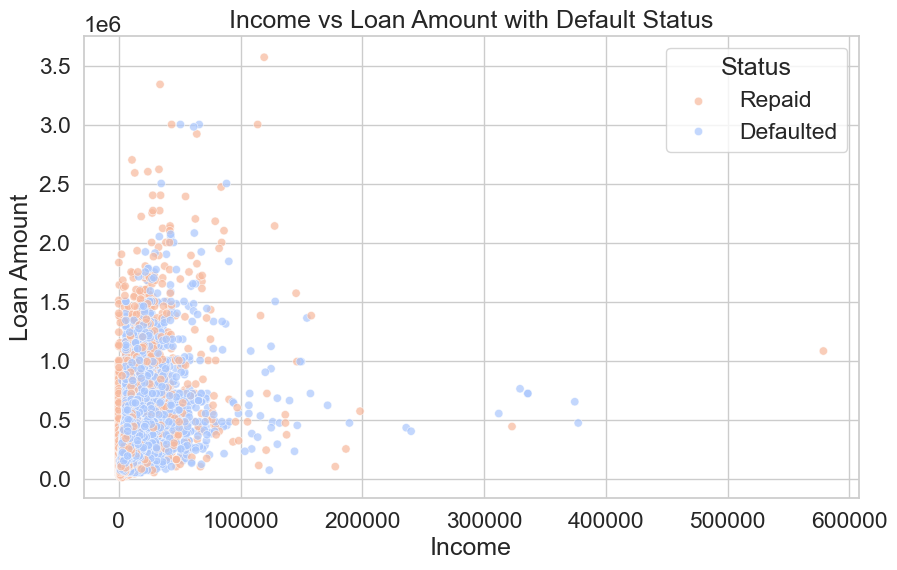

In [71]:
"""
# Income vs. Loan Amount by Default Status
# --------------------------------------------------------------
# Description: Plots borrower income against loan amount, colored by default status.
# Insights:
#  - No clear separation between defaulted (Status = 1) and repaid loans (Status = 0).
# Evidence:
#  - Points for both categories overlap across the entire range of income and loan amounts.
# Action:
#  - Create derived metrics like debt-to-income (DTI) ratio for better predictive insights.
"""
plt.figure(figsize=(10,6))
sns.scatterplot(x="income", y="loan_amount", hue="Status", data=data, alpha=0.7, palette="coolwarm")
plt.title("Income vs Loan Amount with Default Status")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.legend(title="Status", labels=["Repaid", "Defaulted"])
plt.show()


## 6️⃣ Feature Correlation Heatmap

In [72]:
"""
# Feature Correlation Heatmap
# --------------------------------------------------------------
# Description: Visualizes correlations between numerical variables.
# Insights:
#  - Moderate correlation between `income` and `loan_amount` (~0.44).
#  - Weak correlation between `Credit_Score` and `Status` (~0.06).
# Evidence:
#  - Color intensity and numeric values in the heatmap.
# Action:
#  - Focus on multi-variable interactions for predictive modeling.
#  - Remove highly correlated redundant features to avoid multicollinearity.
"""


plt.figure(figsize=(24,12))
corr = data.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle for better readability
sns.heatmap(corr, mask=, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


SyntaxError: invalid syntax (3937633384.py, line 19)

## 7️⃣ Feature Importances (Random Forest)

/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_4939/6966035.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10], palette="coolwarm")


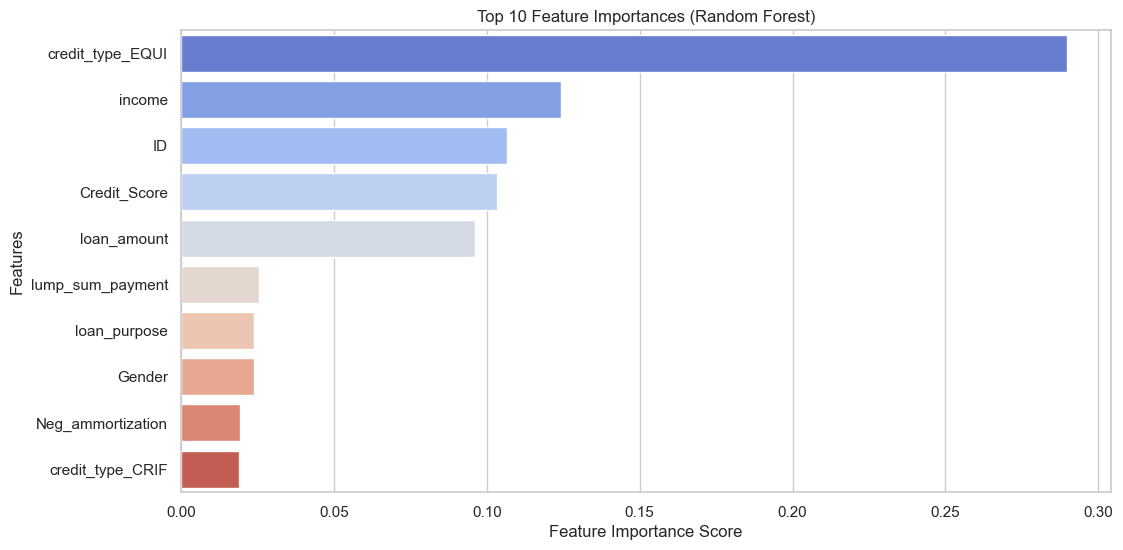

In [ ]:
"""
# Random Forest Feature Importance
# --------------------------------------------------------------
# Description: Displays the top 10 features contributing to loan default prediction.
# Insights:
#  - `credit_type_EQUI` is the most influential feature.
#  - `income`, `Credit_Score`, and `loan_amount` are also key predictors.
# Evidence:
#  - Feature importance scores from Random Forest model.
# Action:
#  - Investigate `ID` for potential data leakage.
#  - Retrain the model with the most important features to improve performance.
#  - Use SHAP values for interpretability and to validate feature impact.
"""

# Assuming 'Status' is the target variable
X = data.drop(columns=["Status"])  # Features
y = data["Status"]  # Target

# Handle categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10], palette="coolwarm")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


---
